In [ ]:
import torch
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
from optimize import optimize

# 1a02F00

In [19]:
dom = '1a02F00'
losses = []
histories = {}

for i, f in enumerate(os.listdir(f'../../steps/folded_structures/optimized/{dom}/')):
    rs = f.split('_')[1]
    with open(f'../../steps/folded_structures/optimized/{dom}/{f}', 'rb') as s:
        temp = pickle.load(s)
        losses.append([int(rs), float(temp['loss'])])
        histories[rs] = temp['history']

losses = np.array(losses)

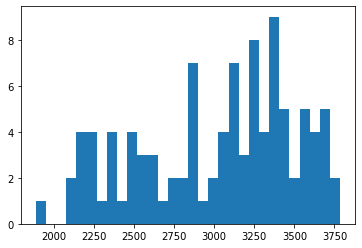

In [3]:
plt.hist(losses[:, 1], bins=30);

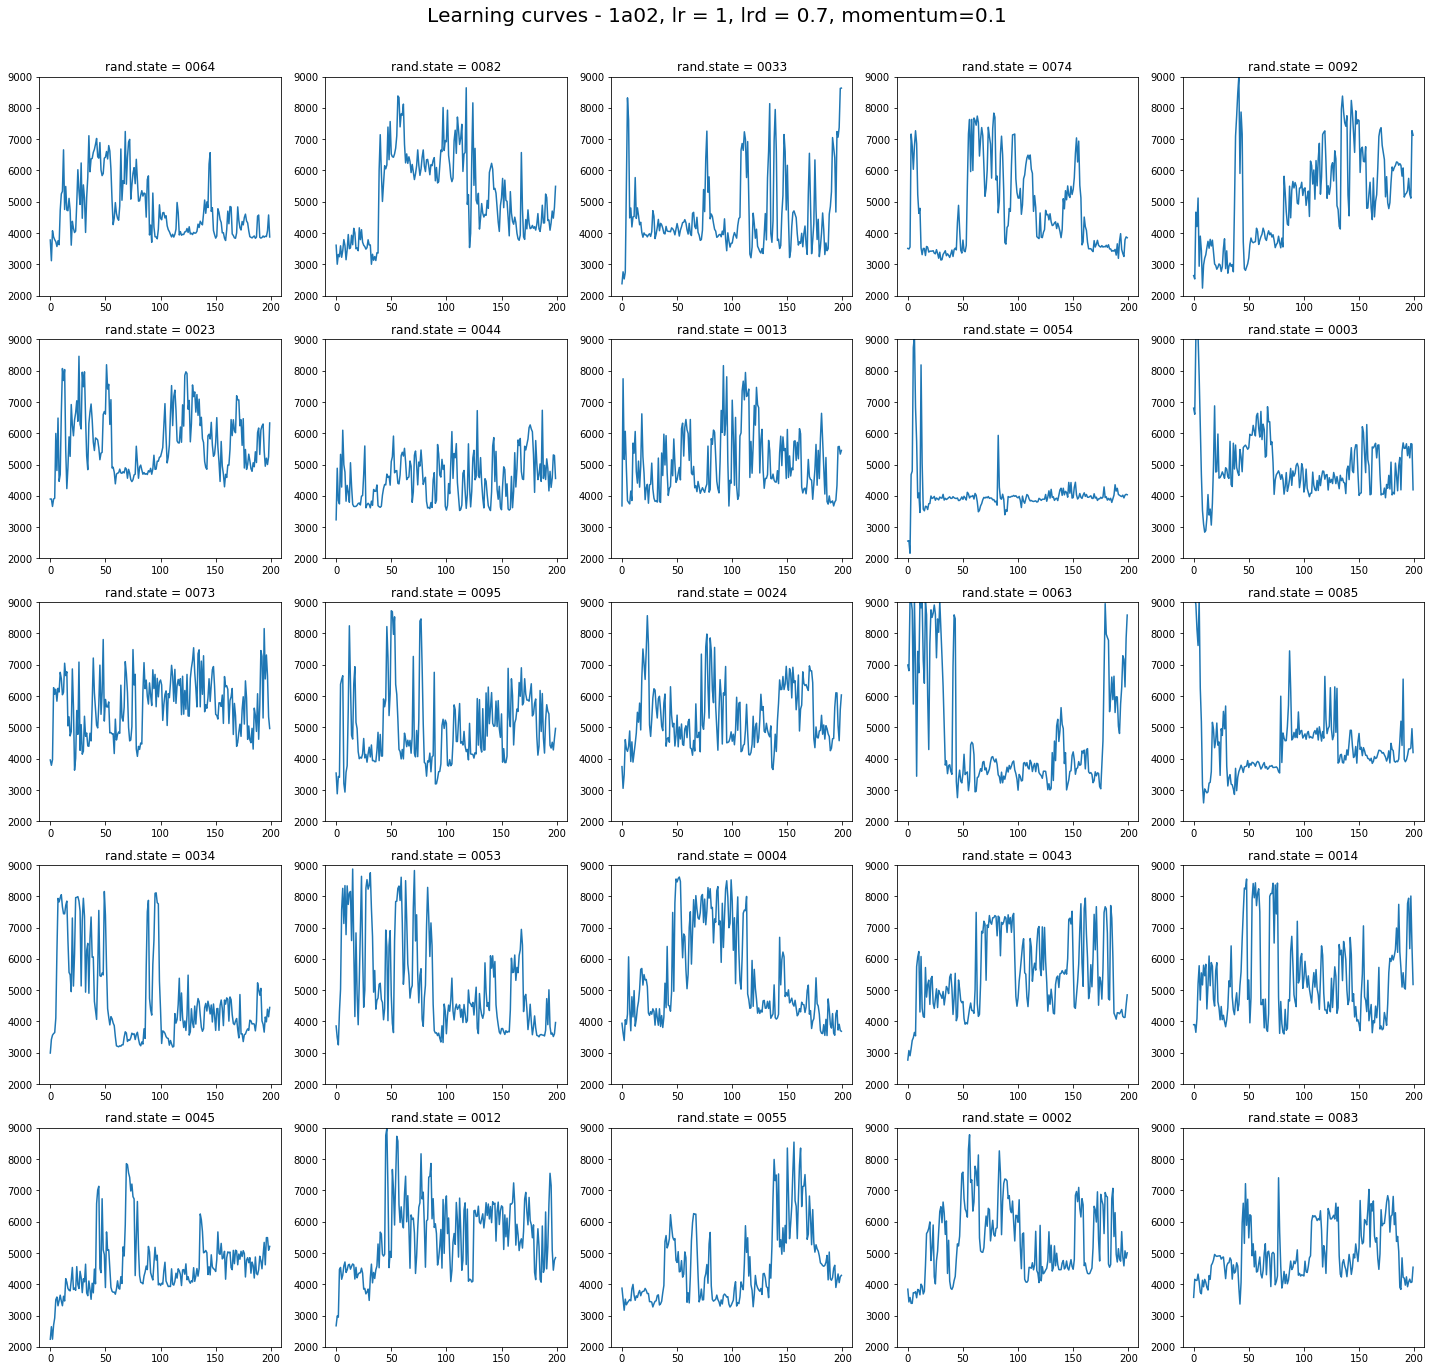

In [32]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))

for i in range(5):
    for j in range(5):
        temp_hist = np.array(histories[list(histories.keys())[5 * i + j]])
        ax[i, j].plot(temp_hist[:, 0], temp_hist[:, 1])
        ax[i, j].set_ylim(2000, 9000)
        ax[i, j].set_title(f'rand.state = {list(histories.keys())[5 * i + j]}')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Learning curves - 1a02, lr = 1, lrd = 0.7, momentum=0.1', fontsize=20)

plt.savefig('../../plots/structure_realization/1a02_learning_curves.png')


In [8]:
with open(f'../../steps/folded_structures/optimized/1a02F00/1a02F00_0058_pred.pkl', 'rb') as s:
        temp = pickle.load(s)
        h = temp['history']

In [9]:
h

[[0, 1887.044677734375],
 [1, 2084.671630859375],
 [2, 2557.989013671875],
 [3, 2584.524658203125],
 [4, 2897.309326171875],
 [5, 3073.452880859375],
 [6, 2482.423583984375],
 [7, 2925.822021484375],
 [8, 3065.394775390625],
 [9, 3173.435546875],
 [10, 3838.40380859375],
 [11, 4040.62744140625],
 [12, 4206.9541015625],
 [13, 7291.30078125],
 [14, 6297.95263671875],
 [15, 7519.08056640625],
 [16, 6953.0732421875],
 [17, 6235.59716796875],
 [18, 7228.55615234375],
 [19, 7582.93115234375],
 [20, 5469.84375],
 [21, 7011.17333984375],
 [22, 7868.5634765625],
 [23, 4764.5126953125],
 [24, 4039.95947265625],
 [25, 4663.93603515625],
 [26, 6707.47802734375],
 [27, 7498.654296875],
 [28, 7116.87060546875],
 [29, 6761.8212890625],
 [30, 7847.6005859375],
 [31, 6681.625],
 [32, 6494.58935546875],
 [33, 5680.09326171875],
 [34, 4587.7490234375],
 [35, 4484.431640625],
 [36, 4168.951171875],
 [37, 4472.6298828125],
 [38, 4309.76904296875],
 [39, 4355.04443359375],
 [40, 4085.64453125],
 [41, 4474.3

# Pick 10 best structures

In [4]:
best = losses[np.argsort(losses[:, 1])][:10]
best

array([[  58.        , 1887.04467773],
       [  69.        , 2083.41137695],
       [  76.        , 2084.42895508],
       [  60.        , 2149.49194336],
       [  54.        , 2165.37182617],
       [  17.        , 2175.22436523],
       [  35.        , 2183.79663086],
       [  25.        , 2208.60693359],
       [  50.        , 2226.25830078],
       [  92.        , 2239.57519531]])

# L-BFGS

In [7]:
dom = '1a02F00'
losses = []
histories = {}

for f in os.listdir(f'../../steps/folded_structures/optimized/{dom}/'):
    rs = f.split('_')[1].split('.')[0]
    with open(f'../../steps/folded_structures/optimized/{dom}/{f}', 'rb') as s:
        temp = pickle.load(s)
        losses.append([int(rs), float(temp['loss'])])
        histories[rs] = temp['history']

losses = np.array(losses)

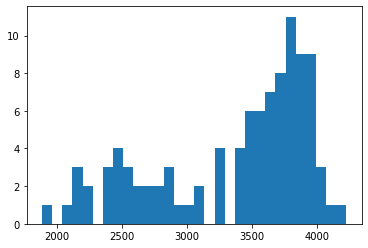

In [9]:
plt.hist(losses[:, 1], bins=30);

Text(0.5, 0.98, 'Learning curves - 1a02, LBFGS - 20 iterations')

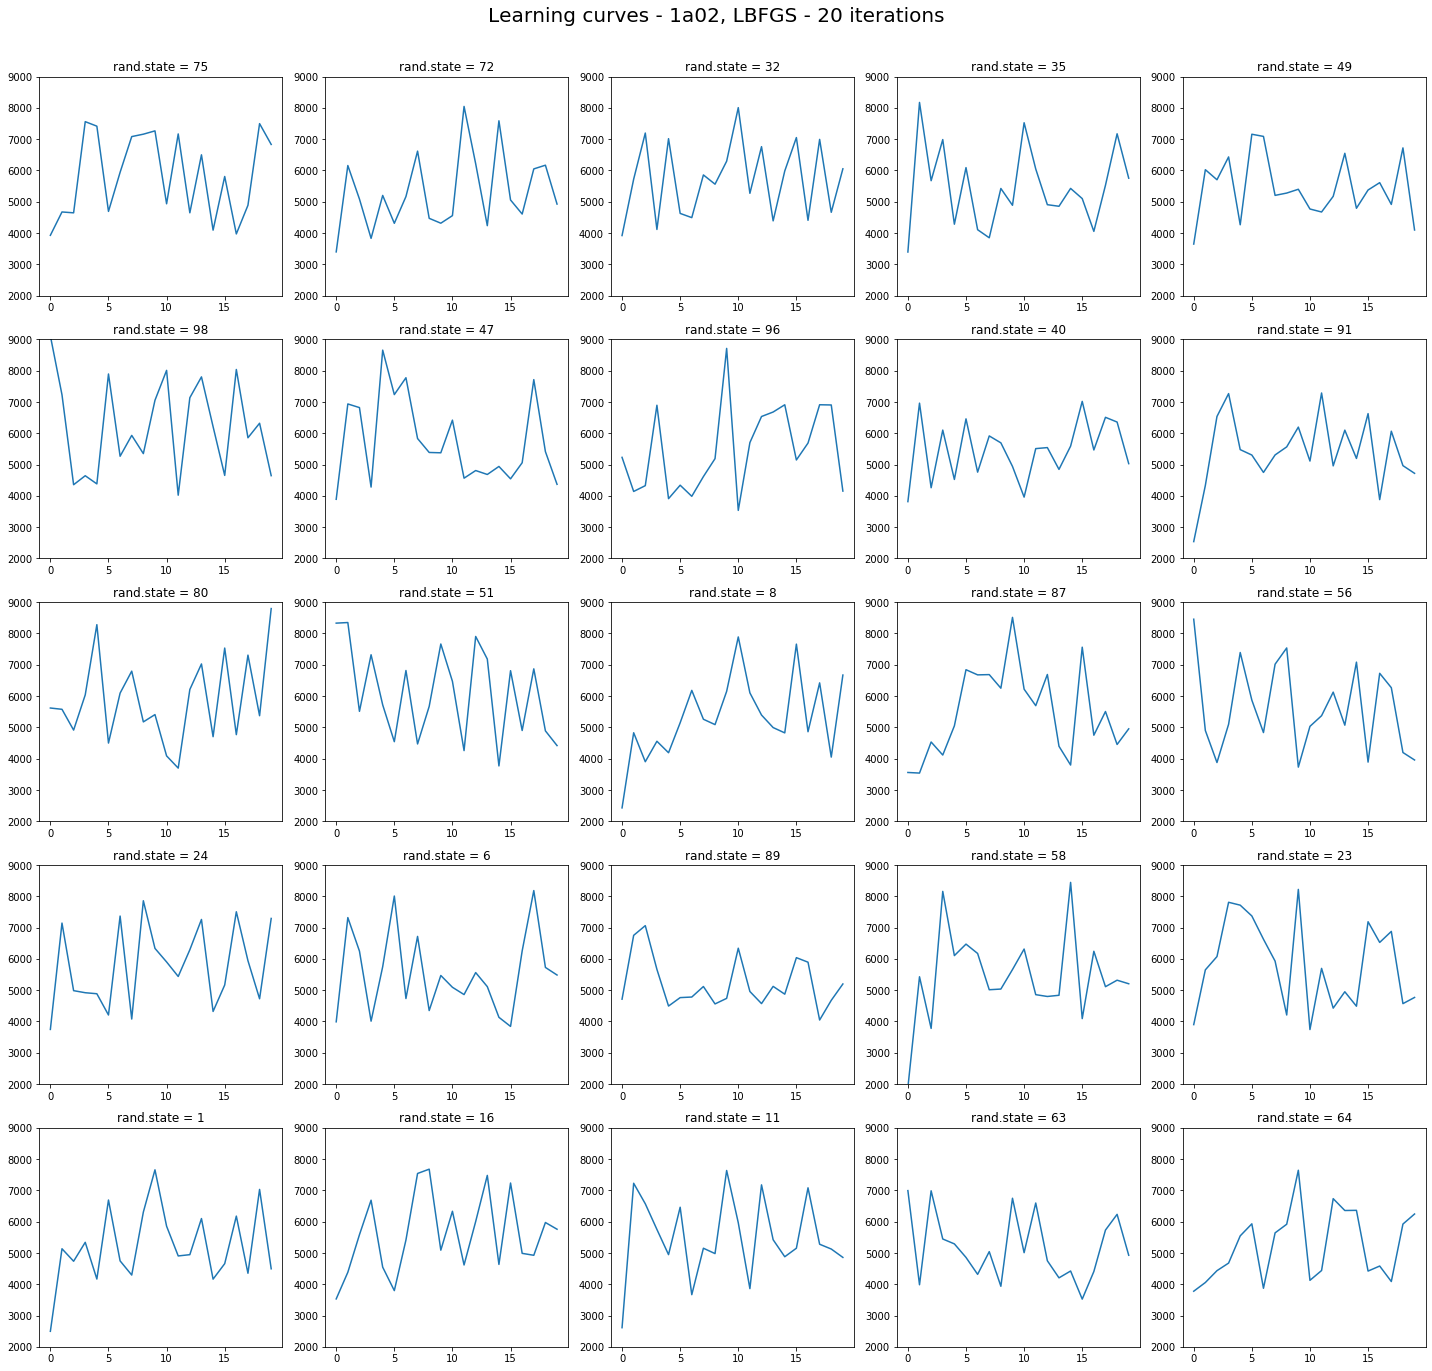

In [11]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))

for i in range(5):
    for j in range(5):
        temp_hist = np.array(histories[list(histories.keys())[5 * i + j]])
        ax[i, j].plot(temp_hist[:, 0], temp_hist[:, 1])
        ax[i, j].set_ylim(2000, 9000)
        ax[i, j].set_title(f'rand.state = {list(histories.keys())[5 * i + j]}')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Learning curves - 1a02, LBFGS - 20 iterations', fontsize=20)

plt.savefig('../../plots/structure_realization/1a02_lbfgs_learning_curves.png')

# 16pkA01

In [2]:
dom = '16pkA01'
losses = []
histories = {}

for f in os.listdir(f'../../steps/folded_structures/optimized/{dom}/'):
    rs = f.split('_')[1].split('.')[0]
    with open(f'../../steps/folded_structures/optimized/{dom}/{f}', 'rb') as s:
        temp = pickle.load(s)
        losses.append([int(rs), float(temp['loss'])])
        histories[rs] = temp['history']

losses = np.array(losses)

(array([12., 14., 34., 14.,  2.,  1.,  2., 11.,  8.,  2.]),
 array([33081.5      , 33751.7171875, 34421.934375 , 35092.1515625,
        35762.36875  , 36432.5859375, 37102.803125 , 37773.0203125,
        38443.2375   , 39113.4546875, 39783.671875 ]),
 <a list of 10 Patch objects>)

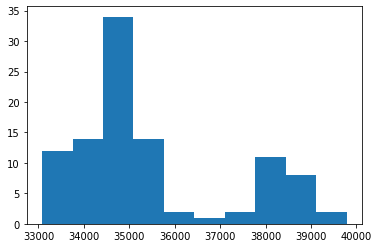

In [8]:
plt.hist(losses[:, 1])

In [10]:
histories.keys()

dict_keys(['78', '71', '76', '5', '43', '92', '44', '95', '38', '2', '36', '31', '20', '27', '84', '55', '29', '83', '52', '67', '60', '12', '15', '69', '30', '37', '45', '94', '39', '3', '4', '42', '93', '77', '70', '79', '14', '68', '13', '61', '66', '82', '53', '85', '54', '28', '26', '21', '10', '17', '19', '65', '62', '86', '57', '81', '50', '22', '88', '59', '25', '48', '99', '34', '33', '9', '7', '41', '90', '46', '97', '0', '73', '74', '89', '58', '24', '23', '80', '51', '87', '56', '63', '18', '64', '16', '11', '75', '72', '47', '96', '1', '6', '40', '91', '32', '8', '49', '98', '35'])

Text(0.5, 0.98, 'Learning curves - 16pkA01, LBFGS - 20 iterations')

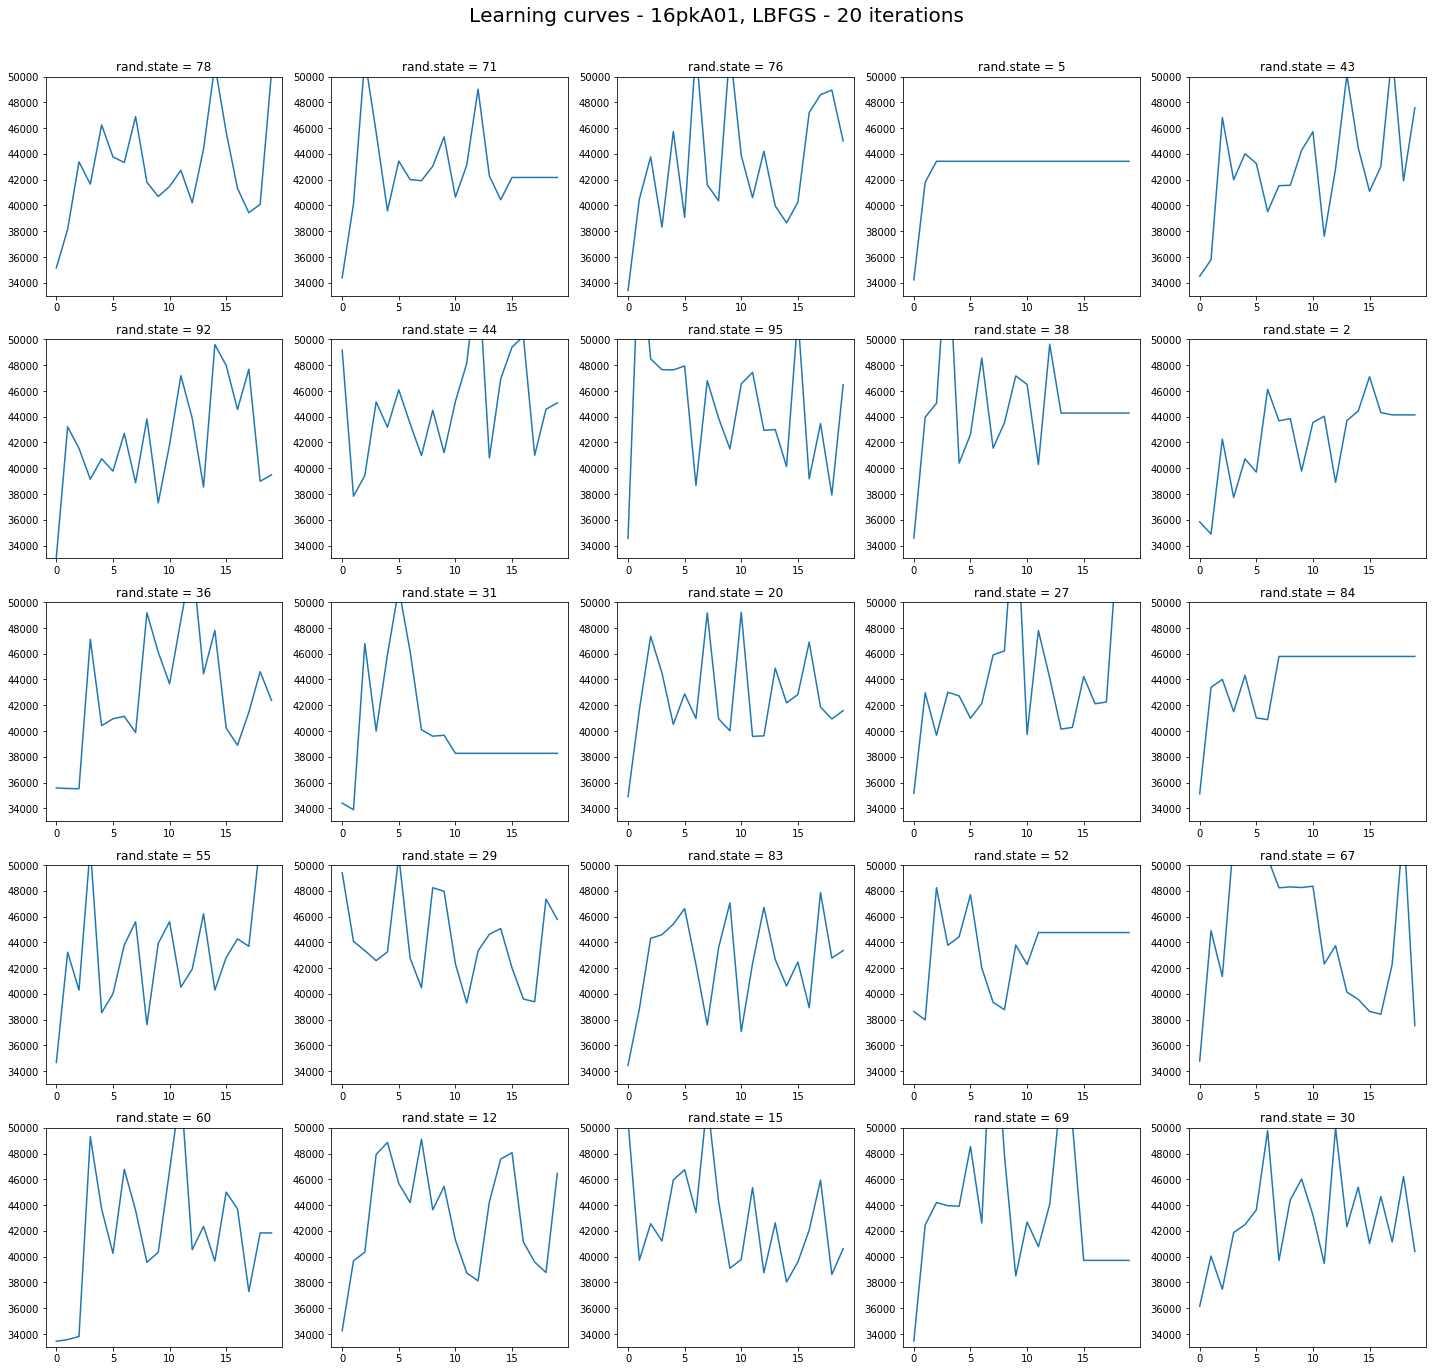

In [12]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))

for i in range(5):
    for j in range(5):
        temp_hist = np.array(histories[list(histories.keys())[5 * i + j]])
        ax[i, j].plot(temp_hist[:, 0], temp_hist[:, 1])
        ax[i, j].set_ylim(33000, 50000)
        ax[i, j].set_title(f'rand.state = {list(histories.keys())[5 * i + j]}')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Learning curves - 16pkA01, LBFGS - 20 iterations', fontsize=20)

# Experimenting with Hyperparameters on larger domain

In [2]:
o = optimize('16pkA01', random_state = 60, verbose=1)

Iteration 0, Loss: 33422.08984375
Iteration 1, Loss: 33422.9140625
Iteration 2, Loss: 33420.359375
Iteration 3, Loss: 33416.8671875
Iteration 4, Loss: 33414.50390625
Iteration 5, Loss: 33408.3046875
Iteration 6, Loss: 33397.95703125
Iteration 7, Loss: 33388.33984375
Iteration 8, Loss: 33381.19140625
Iteration 9, Loss: 33373.37890625
Iteration 10, Loss: 33364.88671875
Iteration 11, Loss: 33356.8515625
Iteration 12, Loss: 33348.984375
Iteration 13, Loss: 33340.91015625
Iteration 14, Loss: 33334.6328125
Iteration 15, Loss: 33329.40234375
Iteration 16, Loss: 33325.671875
Iteration 17, Loss: 33320.57421875
Iteration 18, Loss: 33316.61328125
Iteration 19, Loss: 33310.07421875
Iteration 20, Loss: 33305.359375
Iteration 21, Loss: 33299.015625
Iteration 22, Loss: 33289.98828125
Iteration 23, Loss: 33279.453125
Iteration 24, Loss: 33271.2421875
Iteration 25, Loss: 33264.61328125
Iteration 26, Loss: 33258.85546875
Iteration 27, Loss: 33253.24609375
Iteration 28, Loss: 33248.01171875
Iteration 29,

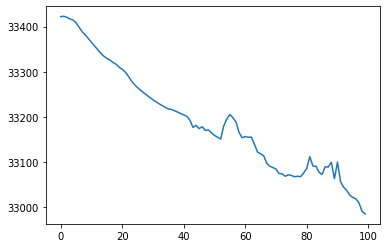

In [4]:
plt.plot(o[2][:, 0], o[2][:, 1])

In [16]:
losses = {}
histories = {}
params = {}

for i, f in enumerate(os.listdir(f'../../steps/folded_structures/16pk_trials/')):
    if f != 'bin':
        d, rs, l, ld, m, aa = f.split('_')
        with open(f'../../steps/folded_structures/16pk_trials/{f}', 'rb') as s:
            temp = pickle.load(s)
            losses[i] = float(temp['loss'])
            histories[i] = np.array(temp['history'])
            params[i] = [l, ld, m] 

losses = np.array(losses)

In [17]:
losses

array({1: 32440.734375, 2: 31426.09765625, 3: 32143.58203125, 4: 32240.86328125, 5: 33422.08984375, 6: 31561.73828125, 7: 32437.638671875, 8: 31094.33984375, 9: 32613.158203125, 10: 32583.92578125, 11: 32282.55078125, 12: 32154.615234375},
      dtype=object)

In [18]:
params

{1: ['0.001', '1.0', '0.0'],
 2: ['0.010', '0.5', '0.5'],
 3: ['0.100', '0.5', '0.1'],
 4: ['0.001', '0.5', '0.5'],
 5: ['0.100', '0.5', '0.9'],
 6: ['0.010', '1.0', '0.0'],
 7: ['0.001', '0.5', '0.9'],
 8: ['0.100', '0.5', '0.5'],
 9: ['0.001', '0.5', '0.1'],
 10: ['0.100', '1.0', '0.0'],
 11: ['0.010', '0.5', '0.9'],
 12: ['0.010', '0.5', '0.1']}

In [24]:
recoder = {1:10, 2:3, 3:8, 4:5,
           5:6, 6:12, 7:2, 8:11,
           9:1, 10:9, 11:4, 12:7
          }

In [37]:
import matplotlib
font = {'size'   : 11}

matplotlib.rc('font', **font)

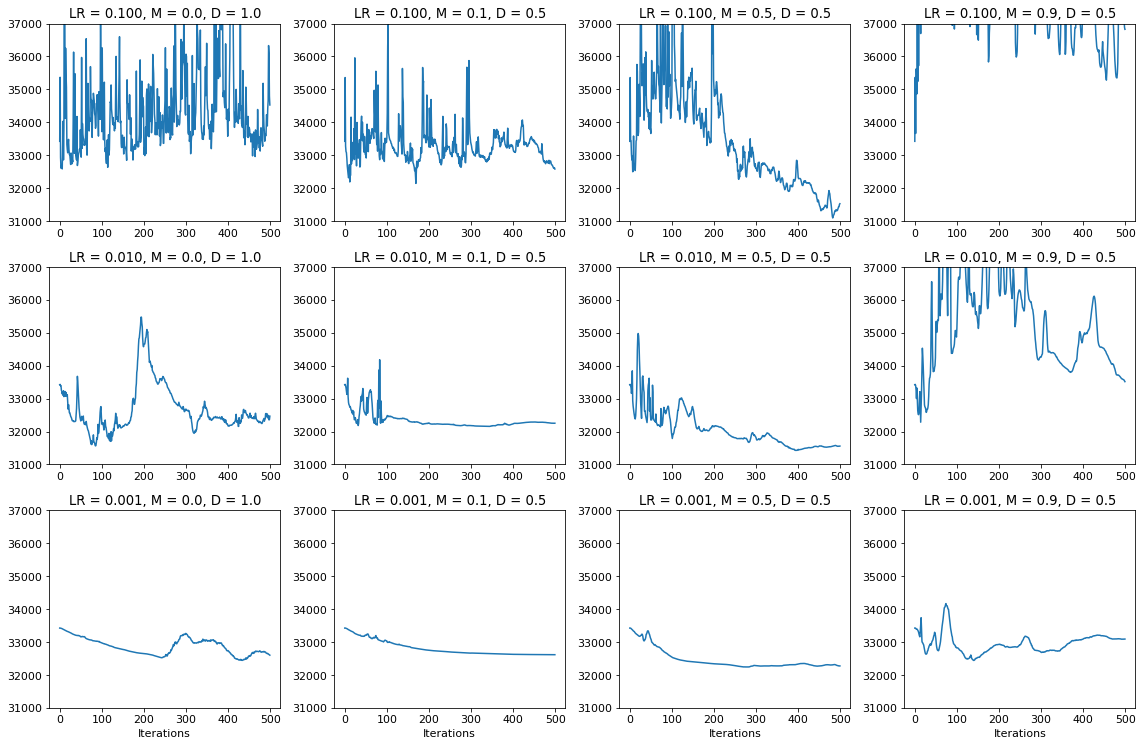

In [39]:
fig, ax = plt.subplots(3, 4, figsize=(16, 10.5))

for i in range(3):
    for j in range(4):
        ind = recoder[i * 4 + j + 1]
        ax[i, j].plot(histories[ind][:, 0], histories[ind][:, 1])
        l, d, m = params[ind]
        ax[i, j].set_title(f'LR = {l}, M = {m}, D = {d}')
        ax[i, j].set_ylim(31000, 37000)

for j in range(4):
    ax[2, j].set_xlabel('Iterations')
plt.tight_layout()

plt.savefig('../../plots/structure_realization/16pk_learning_curves.png', dpi=100)

In [15]:
histories[12]

array([[0.00000000e+00, 3.34220898e+04],
       [1.00000000e+00, 3.34228750e+04]])

# 139lA00

In [3]:
dom = '139lA00'
losses = {}
histories = {}

for i, f in enumerate(os.listdir(f'../../steps/folded_structures/optimized/{dom}/')):
    rs = f.split('_')[1]
    with open(f'../../steps/folded_structures/optimized/{dom}/{f}', 'rb') as s:
        temp = pickle.load(s)
        #losses.append([int(rs), float(temp['loss'])])
        losses[rs] = float(temp['loss'])
        histories[rs] = temp['history']

#losses = np.array(losses)

(array([ 11.,  21.,  33.,  64., 104., 168., 258., 246.,  77.,  18.]),
 array([18477.359375  , 18696.83554688, 18916.31171875, 19135.78789063,
        19355.2640625 , 19574.74023438, 19794.21640625, 20013.69257812,
        20233.16875   , 20452.64492187, 20672.12109375]),
 <a list of 10 Patch objects>)

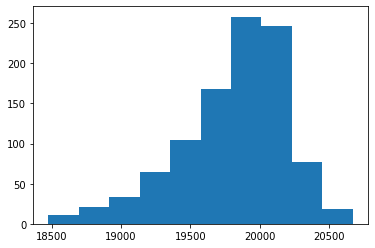

In [11]:
plt.hist(list(losses.values()))

In [13]:
np.argmin(list(losses.values()))

435

In [14]:
list(losses.keys())[435]

'909'

In [15]:
with open(f'../../steps/folded_structures/optimized/139lA00/139lA00_909_0.100_0.5_0.5_pred.pkl', 'rb') as s:
    st = pickle.load(s)

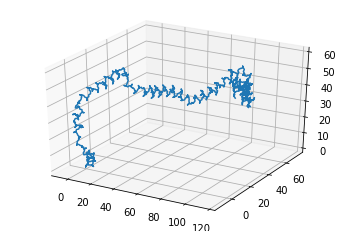

In [17]:
st['beststructure'].visualize_structure()

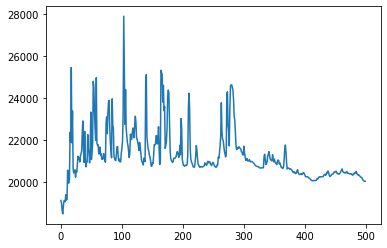

In [23]:
plt.plot(np.array(st['history'])[:, 0], np.array(st['history'])[:, 1])

In [25]:
with torch.no_grad():
    d = st['beststructure'].G()

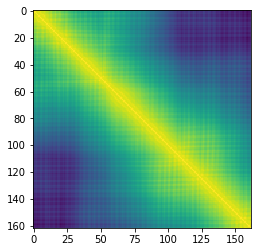

In [28]:
plt.imshow(d, cmap='viridis_r')

In [34]:
with open(f'../../steps/predicted_outputs/139lA00.out', 'rb') as f:
    d = pickle.load(f)

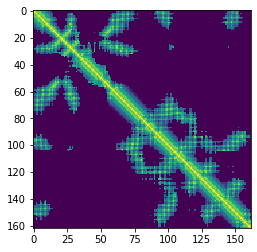

In [35]:
plt.imshow(torch.argmax(d['distogram'], dim=0), cmap='viridis_r')

In [36]:
# reality
dreal = torch.load('../../data/our_input/distance_maps/distance_maps32/139lA00.pt')

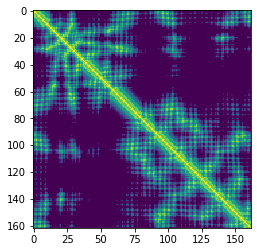

In [38]:
plt.imshow(dreal, cmap='viridis_r')

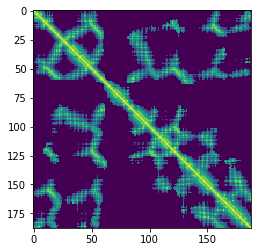

In [40]:
with open(f'../../steps/predicted_outputs/16pkA01.out', 'rb') as f:
    d = pickle.load(f)
plt.imshow(torch.argmax(d['distogram'], dim=0), cmap='viridis_r')

### I should probably pick a smaller domain that has a helix and sheet and also good prediction

In [39]:
with open('../../steps/domain_lengths.pkl', 'rb') as f:
    domain_lengths = pickle.load(f)

In [43]:
train_domains = np.loadtxt('../../data/our_input/train_domains.csv', dtype='O')

In [44]:
train_domains

array(['1zv1A00', '3t6pA02', '2ekfA01', ..., '1ldjA05', '2ebvA00',
       '1x4wA00'], dtype=object)

In [45]:
small = {}
for d in domain_lengths:
    if d in train_domains:
        l = domain_lengths[d]
        if l < 64:
            small[d] = l

In [47]:
len(small)

1267

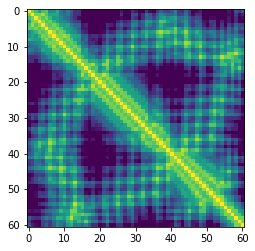

In [50]:
d = list(small.keys())[2]
dm = torch.load(f'../../data/our_input/distance_maps/distance_maps32/{d}.pt')
plt.imshow(dm, cmap='viridis_r')

In [51]:
d

'1z6mA02'

In [52]:
o = optimize('1z6mA02', momentum=0.5, iterations=200)

Iteration 000, Loss: 4742.678
Iteration 010, Loss: 4671.606
Iteration 020, Loss: 4609.543
Iteration 030, Loss: 4590.900
Iteration 040, Loss: 4586.840
Iteration 050, Loss: 4588.453
Iteration 060, Loss: 4595.197
Iteration 070, Loss: 4610.345
Iteration 080, Loss: 4624.217
Iteration 090, Loss: 4634.623
Iteration 100, Loss: 4649.121
Iteration 110, Loss: 4654.142
Iteration 120, Loss: 4673.428
Iteration 130, Loss: 4679.702
Iteration 140, Loss: 4698.238
Iteration 150, Loss: 4723.227
Iteration 160, Loss: 4733.611
Iteration 170, Loss: 4743.213
Iteration 180, Loss: 4767.478
Iteration 190, Loss: 4781.659
Iteration 199, Loss: 4801.057


In [ ]:
for i in os.listdir('1z6mA02_trials/'):
    os.system(f'sbatch 1z6mA02_trials/{i}')

## Hyperparameters on smaller domain - 1z6mA02

In [4]:
losses = {}
histories = {}
params = {}

for i, f in enumerate(os.listdir(f'../../steps/folded_structures/1z6m_trials/')):
    if f != 'bin':
        d, rs, l, ld, m, aa = f.split('_')
        with open(f'../../steps/folded_structures/1z6m_trials/{f}', 'rb') as s:
            temp = pickle.load(s)
            losses[i] = float(temp['loss'])
            histories[i] = np.array(temp['history'])
            params[i] = [l, ld, m] 

losses = np.array(losses)

In [7]:
params

{0: ['0.010', '1.0', '0.0'],
 1: ['0.100', '0.5', '0.9'],
 2: ['0.001', '0.5', '0.5'],
 3: ['0.100', '0.5', '0.1'],
 4: ['0.010', '0.5', '0.5'],
 5: ['0.001', '1.0', '0.0'],
 6: ['0.001', '0.5', '0.1'],
 7: ['0.010', '0.5', '0.1'],
 8: ['0.010', '0.5', '0.9'],
 9: ['0.100', '1.0', '0.0'],
 10: ['0.100', '0.5', '0.5'],
 11: ['0.001', '0.5', '0.9']}

In [8]:
recoder = {1:9, 2:3, 3:10, 4:1,
           5:0, 6:7, 7:4, 8:8,
           9:5, 10:6, 11:2, 12:11
          }

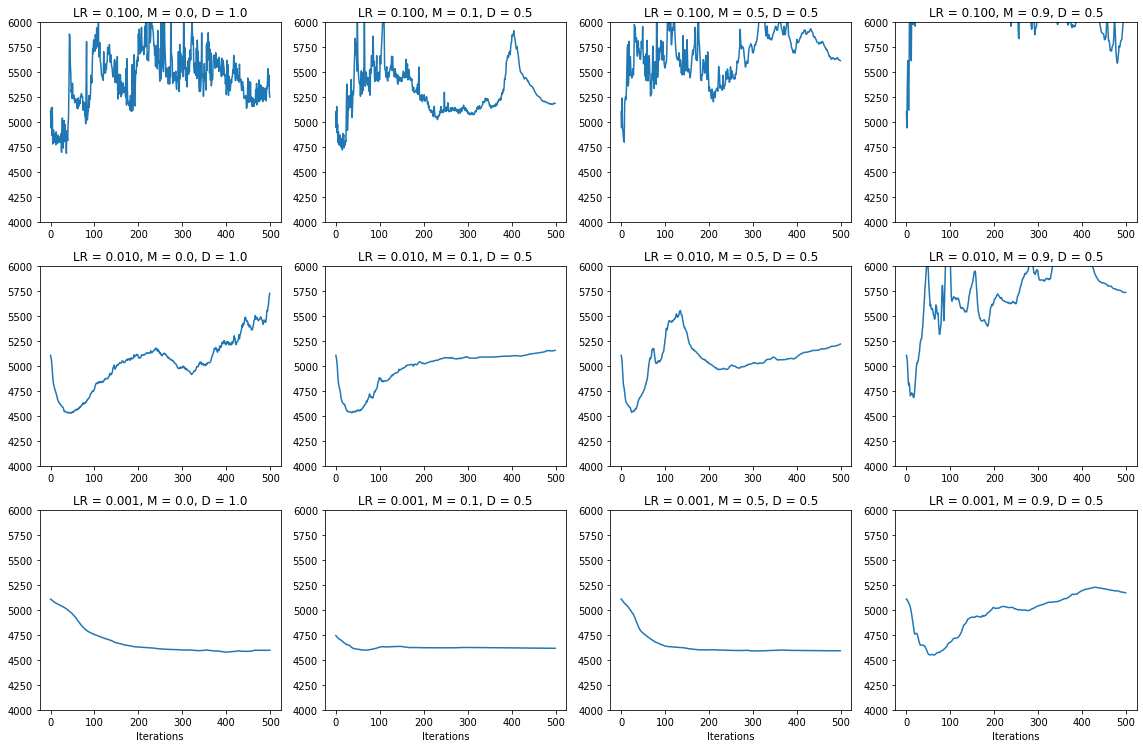

In [13]:
fig, ax = plt.subplots(3, 4, figsize=(16, 10.5))

for i in range(3):
    for j in range(4):
        ind = recoder[i * 4 + j + 1]
        ax[i, j].plot(histories[ind][:, 0], histories[ind][:, 1])
        l, d, m = params[ind]
        ax[i, j].set_title(f'LR = {l}, M = {m}, D = {d}')
        ax[i, j].set_ylim(4000, 6000)

for j in range(4):
    ax[2, j].set_xlabel('Iterations')
plt.tight_layout()

plt.savefig('../../plots/structure_realization/1z6m_learning_curves.png', dpi=100)

In [14]:
losses

array({0: 4530.6767578125, 1: 4944.9560546875, 2: 4588.5576171875, 3: 4725.017578125, 4: 4537.0048828125, 5: 4577.30517578125, 6: 4597.0439453125, 7: 4533.9921875, 8: 4684.9931640625, 9: 4690.017578125, 10: 4802.16357421875, 11: 4547.93017578125},
      dtype=object)

# 1z6m 

In [3]:
dom = '1z6mA02'
losses = {}
histories = {}

for i, f in enumerate(os.listdir(f'../../steps/folded_structures/optimized/{dom}/')):
    rs = f.split('_')[1]
    with open(f'../../steps/folded_structures/optimized/{dom}/{f}', 'rb') as s:
        temp = pickle.load(s)
        #losses.append([int(rs), float(temp['loss'])])
        losses[rs] = float(temp['loss'])
        histories[rs] = temp['history']

(array([195., 162.,  95., 189., 269.,  73.,   9.,   5.,   1.,   2.]),
 array([4513.22167969, 4818.21347656, 5123.20527344, 5428.19707031,
        5733.18886719, 6038.18066406, 6343.17246094, 6648.16425781,
        6953.15605469, 7258.14785156, 7563.13964844]),
 <a list of 10 Patch objects>)

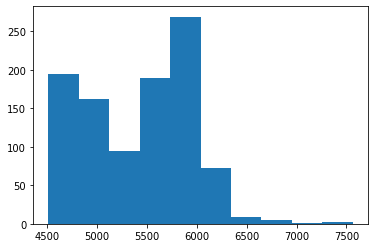

In [4]:
plt.hist(list(losses.values()))

In [5]:
np.argmin(list(losses.values()))

191

In [6]:
list(losses.keys())[191]

'307'

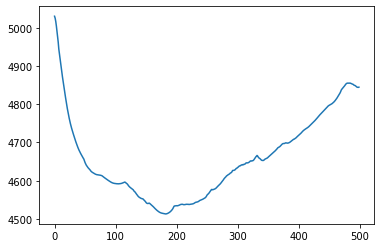

In [9]:
plt.plot(np.array(histories['307'])[:, 0], np.array(histories['307'])[:, 1])

In [10]:
with open(f'../../steps/folded_structures/optimized/1z6mA02/1z6mA02_307_0.001_1.0_0.5_pred.pkl', 'rb') as s:
    bs = pickle.load(s)

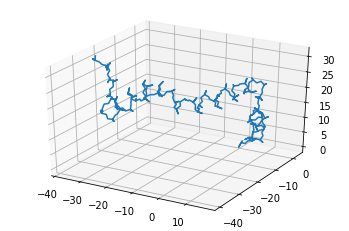

In [11]:
bs['beststructure'].visualize_structure()

In [12]:
with torch.no_grad():
    d = bs['beststructure'].G()

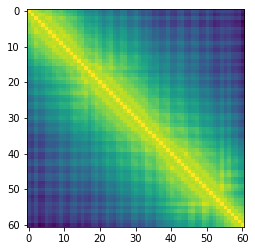

In [14]:
plt.imshow(d, cmap='viridis_r')

# Decrease Probability in the diagonal, so that the learning process is less influenced by it

In [39]:
with open(f'../../steps/predicted_outputs/1z6mA02.out', 'rb') as f:
    d = pickle.load(f)

distogram, phi, psi = d['distogram'], d['phi'], d['psi']

In [4]:
o = optimize('1z6mA02', momentum=0.5, scale_diagonal=0.5, iterations=200)

Iteration 000, Loss: 4742.681
Iteration 010, Loss: 4671.465


KeyboardInterrupt: 